## Data Analysis steps

1) Read the data
2) Clean the data
3) Prepare the data for modelling
4) Modelling
5) Final analysis

In [94]:
## importing libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,cut_tree,linkage

In [95]:
## Reading the data set

ngo= pd.read_csv('Country-data.csv')
ngo

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [96]:
ngo.shape

(167, 10)

In [97]:
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [98]:
## Converting the percentage columns to number columns

ngo['exports'] = (ngo['exports']*ngo['gdpp'])/100
ngo['health'] = (ngo['health']*ngo['gdpp'])/100
ngo['imports']= (ngo['imports']*ngo['gdpp'])/100

In [99]:
## Clean the missing values- No missing values being found

round(ngo.isnull().sum()/len(ngo)*100,2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [100]:
ngo.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## EDA : The data is not normally distributed, one of the features 'Life_expect' has a left side skewness and features like 'Inflation' ,'child_mort' and 'total_fer' has a right side skewness the countries in such region of the bell curve need more attention as the low Life_expect and high Inflation and high fertiity and high child_mort are the bad indicators of developed economy countries, while moderate inflation of 2-3%, and child_mort of 1% per 1000 lives and  fertility of 2 per women are the good indicators of a developed economy

## Apart from the above mentioned features, rest all features also have right side skewness, countires in such region are part of developed economy and doesn't require much attention


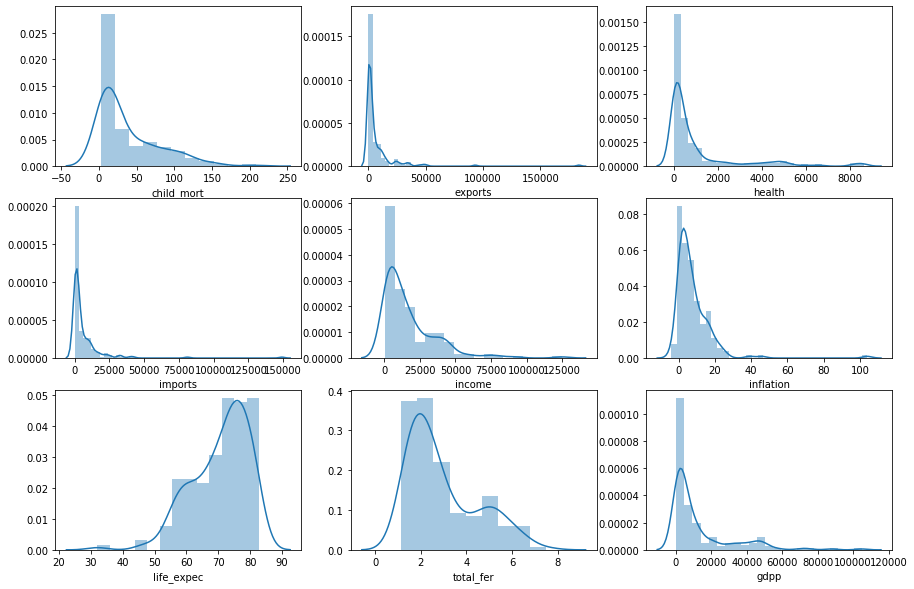

In [101]:
## Plotting distribution plot

plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.distplot(ngo['child_mort'])
plt.subplot(3,3,2)
sns.distplot(ngo['exports'])
plt.subplot(3,3,3)
sns.distplot(ngo['health'])
plt.subplot(3,3,4)
sns.distplot(ngo['imports'])
plt.subplot(3,3,5)
sns.distplot(ngo['income'])
plt.subplot(3,3,6)
sns.distplot(ngo['inflation'])
plt.subplot(3,3,7)
sns.distplot(ngo['life_expec'])
plt.subplot(3,3,8)
sns.distplot(ngo['total_fer'])
plt.subplot(3,3,9)
sns.distplot(ngo['gdpp'])

plt.show()




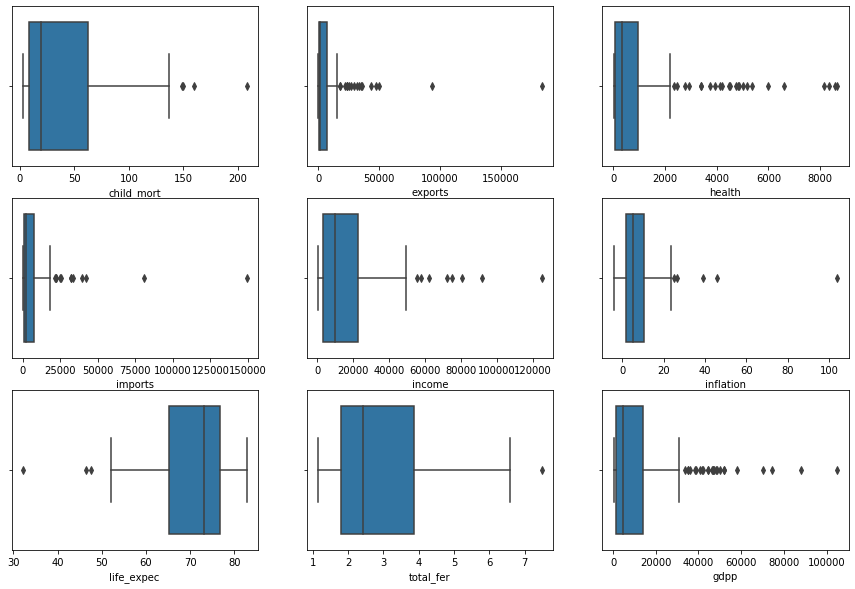

In [102]:
## Outlier Analysis

plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.boxplot(ngo['child_mort'])
plt.subplot(3,3,2)
sns.boxplot(ngo['exports'])
plt.subplot(3,3,3)
sns.boxplot(ngo['health'])
plt.subplot(3,3,4)
sns.boxplot(ngo['imports'])
plt.subplot(3,3,5)
sns.boxplot(ngo['income'])
plt.subplot(3,3,6)
sns.boxplot(ngo['inflation'])
plt.subplot(3,3,7)
sns.boxplot(ngo['life_expec'])
plt.subplot(3,3,8)
sns.boxplot(ngo['total_fer'])
plt.subplot(3,3,9)
sns.boxplot(ngo['gdpp'])

plt.show()

In [103]:
## Outlier Treatment

#child_mort
Q1= ngo['child_mort'].quantile(0.01)
Q4= ngo['child_mort'].quantile(0.99)
ngo['child_mort'][ngo['child_mort']<=Q1]=Q1
ngo['child_mort'][ngo['child_mort']>=Q4]=Q4

#exports
Q1= ngo['exports'].quantile(0.01)
Q4= ngo['exports'].quantile(0.99)
ngo['exports'][ngo['exports']<=Q1]=Q1
ngo['exports'][ngo['exports']>=Q4]=Q4

#health
Q1= ngo['health'].quantile(0.01)
Q4= ngo['health'].quantile(0.99)
ngo['health'][ngo['health']<=Q1]=Q1
ngo['health'][ngo['health']>=Q4]=Q4

#imports
Q1= ngo['imports'].quantile(0.01)
Q4= ngo['imports'].quantile(0.99)
ngo['imports'][ngo['imports']<=Q1]=Q1
ngo['imports'][ngo['imports']>=Q4]=Q4

#income
Q1= ngo['income'].quantile(0.01)
Q4= ngo['income'].quantile(0.99)
ngo['income'][ngo['income']<=Q1]=Q1
ngo['income'][ngo['income']>=Q4]=Q4

#inflation
Q1= ngo['inflation'].quantile(0.01)
Q4= ngo['inflation'].quantile(0.99)
ngo['inflation'][ngo['inflation']<=Q1]=Q1
ngo['inflation'][ngo['inflation']>=Q4]=Q4

#life_expec
Q1= ngo['life_expec'].quantile(0.01)
Q4= ngo['life_expec'].quantile(0.99)
ngo['life_expec'][ngo['life_expec']<=Q1]=Q1
ngo['life_expec'][ngo['life_expec']>=Q4]=Q4

#total_fer
Q1= ngo['total_fer'].quantile(0.01)
Q4= ngo['total_fer'].quantile(0.99)
ngo['total_fer'][ngo['total_fer']<=Q1]=Q1
ngo['total_fer'][ngo['total_fer']>=Q4]=Q4

#gdpp
Q1= ngo['gdpp'].quantile(0.01)
Q4= ngo['gdpp'].quantile(0.99)
ngo['gdpp'][ngo['gdpp']<=Q1]=Q1
ngo['gdpp'][ngo['gdpp']>=Q4]=Q4


In [104]:
## Creating new df with only features for scaling

new_df= ngo[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]
new_df

child_mort  exports    health   imports   income  inflation  life_expec  \
0          90.2    55.30   41.9174   248.297   1610.0      9.440        56.2   
1          16.6  1145.20  267.8950  1987.740   9930.0      4.490        76.3   
2          27.3  1712.64  185.9820  1400.440  12900.0     16.100        76.5   
3         119.0  2199.19  100.6050  1514.370   5900.0     22.400        60.1   
4          10.3  5551.00  735.6600  7185.800  19100.0      1.440        76.8   
..          ...      ...       ...       ...      ...        ...         ...   
162        29.2  1384.02  155.9250  1565.190   2950.0      2.620        63.0   
163        17.1  3847.50  662.8500  2376.000  16500.0     41.478        75.4   
164        23.3   943.20   89.6040  1050.620   4490.0     12.100        73.1   
165        56.3   393.00   67.8580   450.640   4480.0     23.600        67.5   
166        83.1   540.20   85.9940   451.140   3280.0     14.000        52.0   

     total_fer     gdpp  
0         5.82    553.0  
1         1.65   4090.0  
2         2.89   4460.0  
3         6.16   3530.0  
4         2.13  12200.0  
..         ...      ...  
162       3.50   2970.0  
163       2.47  13500.0  
164       1.95   1310.0  
165       4.67   1310.0  
166       5.40   1460.0  

[167 rows x 9 columns]

In [105]:
##Using standard scaler for scaling the variables

scaler= StandardScaler()

## FIT_transform

scaled_df=scaler.fit_transform(new_df)

scaled_df



array([[ 1.34401227, -0.56963804, -0.56698288, ..., -1.69379898,
         1.92692802, -0.70231404],
       [-0.54754345, -0.47387318, -0.44041711, ...,  0.66305283,
        -0.86591134, -0.49877488],
       [-0.27254826, -0.42401465, -0.48629503, ...,  0.68650409,
        -0.03542674, -0.47748297],
       ...,
       [-0.3753502 , -0.49162206, -0.54027452, ...,  0.28783264,
        -0.66498765, -0.65875194],
       [ 0.47276581, -0.53996578, -0.55245405, ..., -0.36880269,
         1.15672052, -0.65875194],
       [ 1.16153882, -0.52703195, -0.54229642, ..., -2.18627548,
         1.64563484, -0.65012008]])

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [106]:
## Hopkins test

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [107]:
#Converting the numpy array of scaled_df to a dataframe
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
scaled_df

child_mort   exports    health   imports    income  inflation  \
0      1.344012 -0.569638 -0.566983 -0.598844 -0.851772   0.263649   
1     -0.547543 -0.473873 -0.440417 -0.413679 -0.387025  -0.375251   
2     -0.272548 -0.424015 -0.486295 -0.476198 -0.221124   1.123260   
3      2.084186 -0.381264 -0.534113 -0.464070 -0.612136   1.936405   
4     -0.709457 -0.086754 -0.178431  0.139659  0.125202  -0.768917   
..          ...       ...       ...       ...       ...        ...   
162   -0.223717 -0.452889 -0.503129 -0.458660 -0.776921  -0.616614   
163   -0.534693 -0.236434 -0.219210 -0.372349 -0.020031   4.398816   
164   -0.375350 -0.491622 -0.540275 -0.513436 -0.690898   0.606977   
165    0.472766 -0.539966 -0.552454 -0.577305 -0.691456   2.091290   
166    1.161539 -0.527032 -0.542296 -0.577252 -0.758487   0.852211   

     life_expec  total_fer      gdpp  
0     -1.693799   1.926928 -0.702314  
1      0.663053  -0.865911 -0.498775  
2      0.686504  -0.035427 -0.477483  
3     -1.236499   2.154642 -0.531000  
4      0.721681  -0.544433 -0.032079  
..          ...        ...       ...  
162   -0.896456   0.373118 -0.563226  
163    0.557522  -0.316720  0.042730  
164    0.287833  -0.664988 -0.658752  
165   -0.368803   1.156721 -0.658752  
166   -2.186275   1.645635 -0.650120  

[167 rows x 9 columns]

In [108]:
## The original dataframe can be used for clustering as the data has high variance when compared to the random data.

hopkins(scaled_df)

0.9007824687167518

## Finding the Optimal Number of clusters

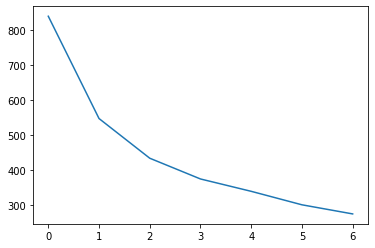

In [109]:
##Elbow curve :the optimal number is where the curve forms an elobow shape in the below case it is 3

ssd=[]

range_n= [2,3,4,5,6,7,8]

for i in range_n:
    kmeans= KMeans(n_clusters=i,max_iter=50)
    kmeans.fit(scaled_df)
    ssd.append(kmeans.inertia_)
    
    
plt.plot(ssd)

In [110]:
##8 Silhoutte Analysis : Measure the goodness of the cluster and from the below data we can use k=3

clusters= [2,3,4,5,6,7,8]

for i in clusters:
    kmeans= KMeans(n_clusters=i,max_iter=50)
    kmeans.fit(scaled_df)
    
    cluster_labels= kmeans.labels_
    silhouette_avg= silhouette_score(scaled_df,cluster_labels)
    print("For cluster={0}, the silhoutte score {1}".format(i,silhouette_avg))

For cluster=2, the silhoutte score 0.46939980287788113
For cluster=3, the silhoutte score 0.40708993455880504
For cluster=4, the silhoutte score 0.39539142309551445
For cluster=5, the silhoutte score 0.38612511707914937
For cluster=6, the silhoutte score 0.2816846970767726
For cluster=7, the silhoutte score 0.29238170000301367
For cluster=8, the silhoutte score 0.291302624633076


## Modelling

In [111]:
## Using Kmeans performing analysis on the scaled_df

kmeans= KMeans(n_clusters=3,max_iter=50,random_state= 30)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=30, tol=0.0001, verbose=0)

In [112]:
## assign cluster_ID to original Data frame

ngo['Cluster_ID']= kmeans.labels_

ngo

country  child_mort  exports    health   imports   income  \
0            Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1                Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2                Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3                 Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4    Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   
..                   ...         ...      ...       ...       ...      ...   
162              Vanuatu        29.2  1384.02  155.9250  1565.190   2950.0   
163            Venezuela        17.1  3847.50  662.8500  2376.000  16500.0   
164              Vietnam        23.3   943.20   89.6040  1050.620   4490.0   
165                Yemen        56.3   393.00   67.8580   450.640   4480.0   
166               Zambia        83.1   540.20   85.9940   451.140   3280.0   

     inflation  life_expec  total_fer     gdpp  Cluster_ID  
0        9.440        56.2       5.82    553.0           1  
1        4.490        76.3       1.65   4090.0           2  
2       16.100        76.5       2.89   4460.0           2  
3       22.400        60.1       6.16   3530.0           1  
4        1.440        76.8       2.13  12200.0           2  
..         ...         ...        ...      ...         ...  
162      2.620        63.0       3.50   2970.0           2  
163     41.478        75.4       2.47  13500.0           2  
164     12.100        73.1       1.95   1310.0           2  
165     23.600        67.5       4.67   1310.0           1  
166     14.000        52.0       5.40   1460.0           1  

[167 rows x 11 columns]

## Cluster profiling using the cluster_id on the original data frame

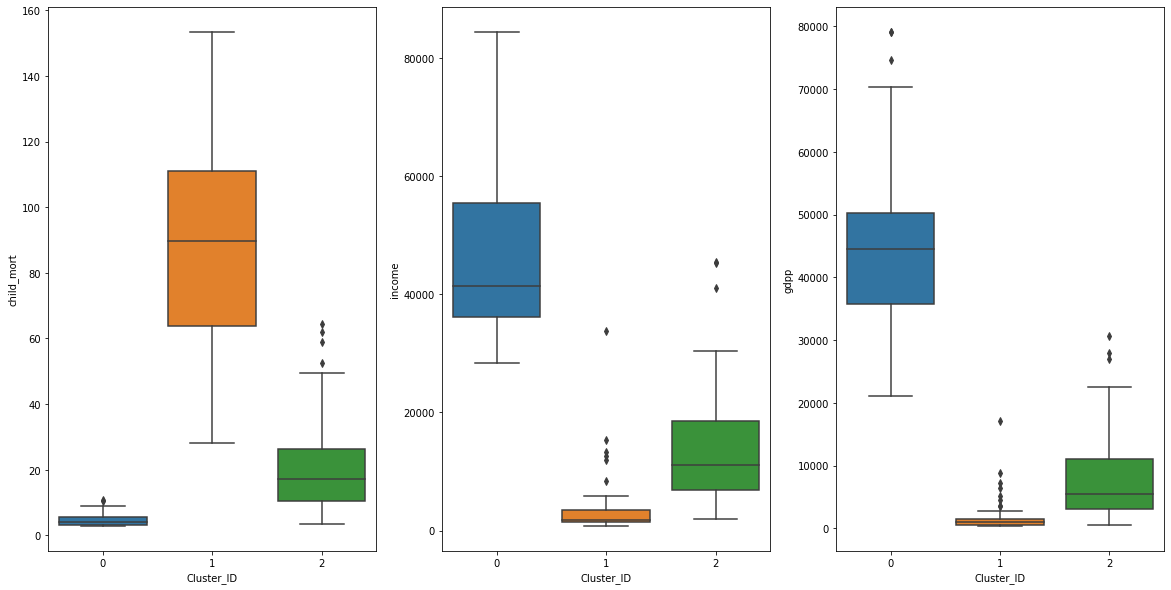

In [113]:
## As per the below boxplot we see that countries in cluster '1' have high child_mort and low income and GDPP

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.boxplot(x='Cluster_ID',y='child_mort',data=ngo)
plt.subplot(1,3,2)
sns.boxplot(x='Cluster_ID',y='income',data=ngo)
plt.subplot(1,3,3)
sns.boxplot(x='Cluster_ID',y='gdpp',data=ngo)

plt.show()

## Assiging the Cluster_ID to scaled_df for further analysis on cluster profiling, as features like child_mort with low values doesn't show up in the graph against the values like income and gddp which are high valued data.

In [114]:
#Assiging the cluster ID to the scaled_DF to plot the below graph
scaled_df['Cluster_ID']= kmeans.labels_


In [115]:
## As per the below barplot we see that countries in cluster '1' have high child_mort and low income and GDPP
plt.figure(figsize=(50,50))

scaled_df.groupby('Cluster_ID').mean().plot(kind='bar')
plt.legend(loc=0, prop={'size':7})

<Figure size 3600x3600 with 0 Axes>

## Conclusion

In [116]:
## Countries present in cluster '1' needs have urgent needs of funds
ngo[ngo['Cluster_ID']==1].sort_values(by=['child_mort','income','gdpp'],ascending= [False,True,True])[0:5]


country  child_mort  exports   health  imports  income  \
132              Sierra Leone       153.4   67.032  52.2690  137.655  1220.0   
66                      Haiti       153.4  101.286  45.7442  428.314  1500.0   
32                       Chad       150.0  330.096  40.6341  390.195  1930.0   
31   Central African Republic       149.0   52.628  17.7508  118.190   888.0   
97                       Mali       137.0  161.424  35.2584  248.508  1870.0   

     inflation  life_expec  total_fer   gdpp  Cluster_ID  
132      17.20       55.00     5.2000  399.0           1  
66        5.45       47.16     3.3300  662.0           1  
32        6.39       56.50     6.5636  897.0           1  
31        2.01       47.50     5.2100  446.0           1  
97        4.37       59.50     6.5500  708.0           1

## Hierarchical Clustering

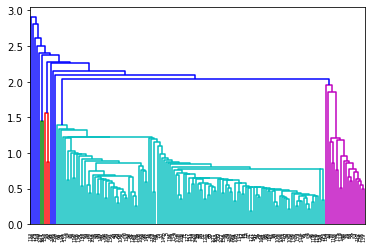

In [117]:
## Single Linkage

mergings = linkage(scaled_df, method= 'single',metric= 'euclidean')

dendrogram(mergings)
plt.show()

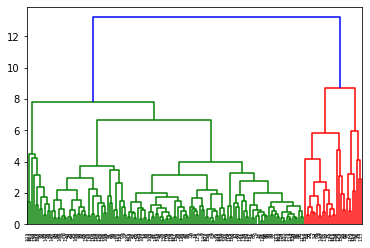

In [118]:
## Complete Linkage

mergings_1 = linkage(scaled_df, method= 'complete',metric= 'euclidean')

dendrogram(mergings_1)
plt.show()

In [119]:
## No. of clusters : Using Complete method as it provides more readable and accurate results.

cluster_labels = cut_tree(mergings_1, n_clusters= 3).reshape(-1,1)

In [120]:
# assign cluster labels
ngo['cluster_labels'] = cluster_labels
ngo.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer     gdpp  Cluster_ID  cluster_labels  
0       9.44        56.2       5.82    553.0           1               0  
1       4.49        76.3       1.65   4090.0           2               0  
2      16.10        76.5       2.89   4460.0           2               0  
3      22.40        60.1       6.16   3530.0           1               0  
4       1.44        76.8       2.13  12200.0           2               0

In [121]:
## As per the below boxplot we see that countries in cluster '0' have high child_mort, low (income and gdp)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_labels',y='child_mort',data=ngo)
plt.subplot(1,3,2)
sns.boxplot(x='cluster_labels',y='income',data=ngo)
plt.subplot(1,3,3)
sns.boxplot(x='cluster_labels',y='gdpp',data=ngo)

plt.show()

## Assiging the Cluster_labels to scaled_df for further analysis on cluster profiling, as features like child_mort with low values doesn't show up in the graph against the values like income and gddp which are high valued data.

In [122]:
#Assiging the cluster labels to the scaled_DF to plot the below graph
scaled_df['cluster_labels'] = cluster_labels

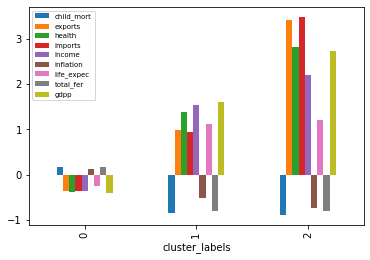

In [123]:
## Cluster profiling using bar plot: We see  thet the child mort in CLuster '0' to be high nad income and gdpp low

scaled_df.drop('Cluster_ID',axis=1).groupby('cluster_labels').mean().plot(kind='bar')

plt.legend(loc=0, prop={'size':7})


## Conclusion

In [124]:
## Countries present in cluster '0' needs urgent needs of funds

ngo.drop('Cluster_ID',axis=1,inplace=True)

ngo[ngo['cluster_labels']==0].sort_values(by=['child_mort','income','gdpp'],ascending= [False,True,True])[0:5]



country  child_mort  exports   health  imports  income  \
132              Sierra Leone       153.4   67.032  52.2690  137.655  1220.0   
66                      Haiti       153.4  101.286  45.7442  428.314  1500.0   
32                       Chad       150.0  330.096  40.6341  390.195  1930.0   
31   Central African Republic       149.0   52.628  17.7508  118.190   888.0   
97                       Mali       137.0  161.424  35.2584  248.508  1870.0   

     inflation  life_expec  total_fer   gdpp  cluster_labels  
132      17.20       55.00     5.2000  399.0               0  
66        5.45       47.16     3.3300  662.0               0  
32        6.39       56.50     6.5636  897.0               0  
31        2.01       47.50     5.2100  446.0               0  
97        4.37       59.50     6.5500  708.0               0